In [2]:
import os
import pandas as pd
from plotnine import (ggplot, geom_density, geom_errorbar,
                     geom_line, geom_point, xlab, ylab, ggtitle, aes,
                     theme, facet_wrap, geom_boxplot, geom_violin,
                     geom_bar, scale_color_discrete)
import json
import scipy.stats as st
import numpy as np

from shutil import which

# custom modules
from pipeline.preprocess.transformers import Pandalizer

ModuleNotFoundError: No module named 'ipywidgets'

In [ ]:
from pipeline.preprocess.core import preprocessing_steps
# from pipeline.preprocess.transformers import Pandalizer, ReplaceCategories

: 

### Load the data

In [3]:
df = pd.read_csv("./data/interim/train.csv")
df.MSZoning.value_counts(normalize=True)

RL       0.788356
RM       0.149315
Other    0.062329
Name: MSZoning, dtype: float64

In [36]:
CATEGORICAL_COLUMNS = [
  'MSZoning','LotShape', 'LandContour', 'LotConfig', 'Neighborhood',
  'Condition1', 'BldgType', 'HouseStyle' 'RoofStyle', 'Exterior1st',
  'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC',
  'GarageType', 'GarageFinish', 'GarageCars', 'SaleType', 'SaleCondition'
]


In [28]:
df.columns

Index(['Unnamed: 0', 'Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [49]:
houses_df = pd.read_csv("../packages/regression_model/regression_model/datasets/train.csv")
houses_df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


### Explore missing values

In [50]:
null_props = houses_df.isnull().mean()
null_props = null_props[null_props > 0]
null_props.sort_values(ascending=False)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

### Is there any relationship of missing values with the response

The above plot doesn't give us a lot of information on the certainty of the Sale Price since the sample size might be too small.

/usr/local/Caskroom/miniconda/base/envs/apm/lib/python3.9/site-packages/numpy/core/_methods.py:265: RuntimeWarning: Degrees of freedom <= 0 for slice
/usr/local/Caskroom/miniconda/base/envs/apm/lib/python3.9/site-packages/numpy/core/_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/Caskroom/miniconda/base/envs/apm/lib/python3.9/site-packages/plotnine/facets/facet.py:434: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/Caskroom/miniconda/base/envs/apm/lib/python3.9/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the y-axis tick text use ... + theme(subplots_adjust={'hspace': 0.25}). Choose an appropriate value for 'hspace'
/usr/local/Caskroom/miniconda/base/envs/apm/lib/python3.9/site-packages/plotnine/layer.py:412: PlotnineWarning: geom_errorbar : Removed 1 rows containing missing values.


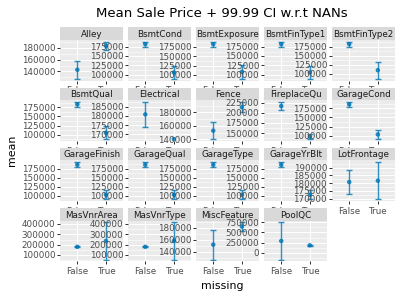

<ggplot: (8787349146899)>

In [6]:
(houses_df[np.append(null_props.index.values, 'SalePrice')]
 .melt(id_vars=['SalePrice'])
 .assign(missing=lambda df: df['value'].isnull())
 .groupby(['variable', 'missing'])
 .agg({"SalePrice": [
    np.mean,
    lambda x: st.t.interval(
      alpha=0.999, df=len(x) - 1, loc=x.mean(), scale=st.sem(x)
   )[0],
    lambda x: st.t.interval(
   
      alpha=0.999, df=len(x) - 1, loc=x.mean(), scale=st.sem(x))[1]
 ]})
 .set_axis(['mean', 'lower', 'upper'], axis=1, inplace=False)
 .reset_index()
 .pipe(ggplot) +
    aes(x='missing', y='mean', color='missing') +
        geom_point(color="#0077b6", alpha=0.8) +
        aes(x='missing', ymin='lower', ymax='upper', color='missing') +
        geom_errorbar(width=.2, size=0.8, color="#0077b6", alpha=0.8) +
        facet_wrap('variable', scales='free') +
        ggtitle("Mean Sale Price + 99.99 CI w.r.t NANs") +
        theme(figure_size=(22, 16))
)


- Since the number of missing values in MasVnrArea and MasVnrType are too few, as well as Electrical, we can remove those observations.
- For the column MiscFeature, PoolQC we are too uncertain so we can probably remove the columns completely.
- LotFrontage looks like it can be imputed with a standard imputation mechanism. This should be done in the resampling
- Rest of the columns can be imputed with a new value (Missing if categorical) and 1920 for the GarageYrBlt since that year has almost the same mean SalePrice as when the mean for when GarageYrBlt is missing.
- Rare categories can be imputed with Rare
<!-- Идея: когато липсват стойности, отклика си има някакво средно, ако направим обърнат линеен модел -->

In [ ]:
(houses_df['GarageYrBlt'] == houses_df['YearBuilt']).mean()

0.7458904109589041

Nearly 75% of the garage year is the same as the house year. 5% are missing, so replacing those 5% with the house year wouldn't not loose too much information/

In [7]:
YEAR_COLUMNS = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']
INTERVAL_COLUMNS = ['BuiltTilSold', 'RemodTilSold', 'GarageBuildTilSold']
YEAR_SOLD_COLUMN_NAME = 'YrSold'

ORDINALS = [
    "LandSlope", "BsmtQual", "BsmtCond",
    "ExterQual", "ExterCond", "FireplaceQu",
    "KitchenQual"
]

NUMERIC_COLUMNS = houses_df._get_numeric_data().columns.values

CATEGORICAL_COLUMNS = (houses_df
 .drop(NUMERIC_COLUMNS, axis=1)
 .drop(ORDINALS, axis=1)
 .columns
 .values
)


In [71]:
# houses_df['LotFrontage'].astype(float).dtype
houses_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [18]:
# Too rare columns would be above 80% of missingness

null_props = houses_df.isnull().mean(axis=0)
too_rare_columns = null_props[null_props > 0.80].index.values
too_rare_columns
houses_processed_df = houses_df.drop(too_rare_columns, axis=1)



### Listwise deletion

In [26]:
houses_processed_df['Electrical'].value_counts(normalize=True)

SBrkr    0.914325
FuseA    0.064428
FuseF    0.018506
FuseP    0.002056
Mix      0.000685
Name: Electrical, dtype: float64

In [46]:
from sklearn.impute import SimpleImputer
x = houses_processed_df.isna().mean()
idx = x[(x > 0)][x < 0.05].index
houses_processed_df[idx]
houses_processed_df[x[x > 0].index]['GarageFinish']
# houses_processed_df[idx].dropna(how='any', subset=idx)


Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [30]:
y = houses_processed_df['BsmtFinType1'] == houses_processed_df['BsmtFinType2']
y.mean()

0.2952054794520548

In [17]:
# drop observations for missing values in MasVnrType, MasVnrArea and Electrical
LISTWISE_DELETION_COLUMNS = ['MasVnrArea', 'MasVnrType', 'Electrical']

listwise_drop_mask = houses_df[LISTWISE_DELETION_COLUMNS].isnull().any(axis=1)
houses_processed_df = houses_df[~listwise_drop_mask]


### Drop columns with mostly the same value, lets say 90%

- This step might not bt a good one if there's some dependence with the response.

In [27]:

categorical_columns = houses_processed_df.columns & CATEGORICAL_COLUMNS
def max_categorical_frequency(column):
    category_props = column.value_counts(normalize=True)
    return category_props.max()

has_too_frequent_columns = houses_processed_df.apply(max_categorical_frequency, axis=0)
above_threshold = has_too_frequent_columns[has_too_frequent_columns > 0.90]
too_frequent_columns = above_threshold.index.values
houses_processed_df = houses_processed_df.drop(too_frequent_columns, axis=1)

above_threshold


Street          0.995890
Utilities       0.999315
LandSlope       0.946575
Condition2      0.989726
RoofMatl        0.982192
BsmtCond        0.921293
Heating         0.978082
CentralAir      0.934932
Electrical      0.914325
LowQualFinSF    0.982192
BsmtHalfBath    0.943836
KitchenAbvGr    0.953425
Functional      0.931507
GarageQual      0.950689
GarageCond      0.961566
PavedDrive      0.917808
3SsnPorch       0.983562
ScreenPorch     0.920548
PoolArea        0.995205
MiscVal         0.964384
dtype: float64

### Replace NaNs in categorical columns with Missing

In [19]:
# replace nans with missing category
categorical_columns = houses_processed_df.columns & CATEGORICAL_COLUMNS
houses_processed_df[categorical_columns] = houses_processed_df[
    categorical_columns
].fillna('Missing')

/var/folders/m5/zsd1m_dd4wd36c3_4bftzh280000gn/T/ipykernel_73893/1731627583.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.


### Take care of Ordinal variables

In [20]:
# take care of ordinal variables and convert them to some scale
ordinal_columns = houses_processed_df.columns & ORDINALS
houses_processed_df[ordinal_columns] = (houses_processed_df[ordinal_columns]
 .replace({
    'Gtl': 1,
    'Mod': 2,
    'Sev': 3,
    'Po': 1,
    'Fa': 2,
    'TA': 3,
    'Gd': 4,
    'Ex': 5,
    'Missing': 0
 })
 .astype(float)
 .fillna(0)
)

/var/folders/m5/zsd1m_dd4wd36c3_4bftzh280000gn/T/ipykernel_73893/1377081613.py:2: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.


### Replace rare categories with Other

In [26]:
# impute categorical missing values with the value 'Missing'

def get_rare_categories(df, columns, rare_prop=0.05):
    cols = df.columns & columns
    value_counts = {k: df[k].value_counts(normalize=True) for k in cols}
    items = value_counts.items()
    rares = {k: list(l[l < rare_prop].index.values) for k, l in items}
    return rares

rare_cat_values = get_rare_categories(houses_processed_df, categorical_columns)
# remove missing
rare_items = rare_cat_values.items()
rare_categories = {k: [x for x in l if x != 'Missing'] for k, l in rare_items}
rare_categories
# save it in a json for the preprocessing step

with open('data/rare_categories.json', 'w') as f:
    json.dump(rare_categories, f)


/var/folders/m5/zsd1m_dd4wd36c3_4bftzh280000gn/T/ipykernel_73893/2914418361.py:4: FutureWarning: Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead.


### Checking for redundant variables
- most of the values of a column are the same
- check for categories which are too much of the same value
- the column is the same as another column
- duplicate rows
- in the initial data analysisto be curious, after making a preliminary analysis, gather questions. Maybe after you can proceed to the exploratory data analysis.
    - After presenting the EDA, you can discuss possible business questions, variables that can be used in modeling.
- Try to have fixed dataset, not being mutable by DE team



In [31]:
ext_first = houses_processed_df['Exterior1st']
ext_second = houses_processed_df['Exterior2nd']
print((ext_first == ext_second).mean())

# mostly the same as 1st floor so drop the 2nd floor exterior column so drop it
houses_processed_df = houses_processed_df.drop(['Exterior2nd'], axis=1)

0.853893866299104


### Store the data to a processed csv

In [ ]:
# write the initially processed data to a csv
from sklearn.model_selection import train_test_split
SEED = 487

# split the data
train_df, test_df = train_test_split(
    houses_processed_df,
    train_size=0.8,
    random_state=SEED
)

# store it in a interim csv
train_df.to_csv("./data/interim/houses_train.csv", index=False)
test_df.to_csv("./data/interim/houses_test.csv", index=False)
